# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [27]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head(10)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [28]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [29]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


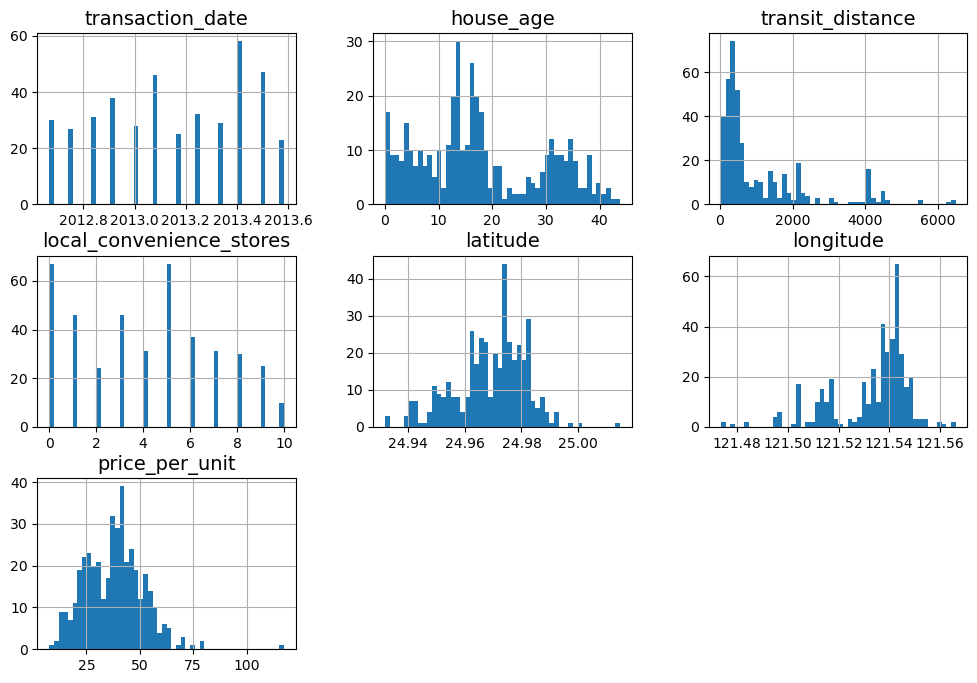

In [3]:
## Feature Distribution
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
plt.show()

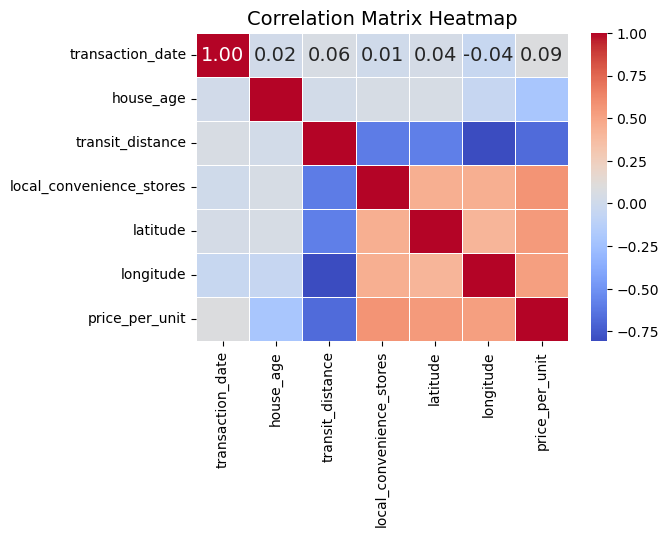

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Correlation Matrix
data_corr = data.corr()
data_corr

# Create a heat map
plt.figure(figsize=(6, 4))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
#Normalizing the data, using max-min normalization
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data)
data_minmax_scaled = pd.DataFrame(data_minmax_scaled, columns=data.columns)
data_minmax_scaled


,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,0.272926,0.730594,0.009513,1.0,0.616941,0.719323,0.275705
1,0.272926,0.445205,0.043809,0.9,0.584949,0.711451,0.314832
2,1.000000,0.303653,0.083315,0.5,0.671231,0.758896,0.361237
3,0.909389,0.303653,0.083315,0.5,0.671231,0.758896,0.429481
4,0.181223,0.114155,0.056799,0.5,0.573194,0.743153,0.323021
...,...,...,...,...,...,...,...
409,0.363537,0.312785,0.627820,0.0,0.114881,0.326504,0.070974
410,0.000000,0.127854,0.010375,0.9,0.512118,0.750162,0.385805
411,0.636463,0.429224,0.056861,0.7,0.571498,0.715225,0.300273
412,0.363537,0.184932,0.012596,0.5,0.420141,0.723959,0.408553


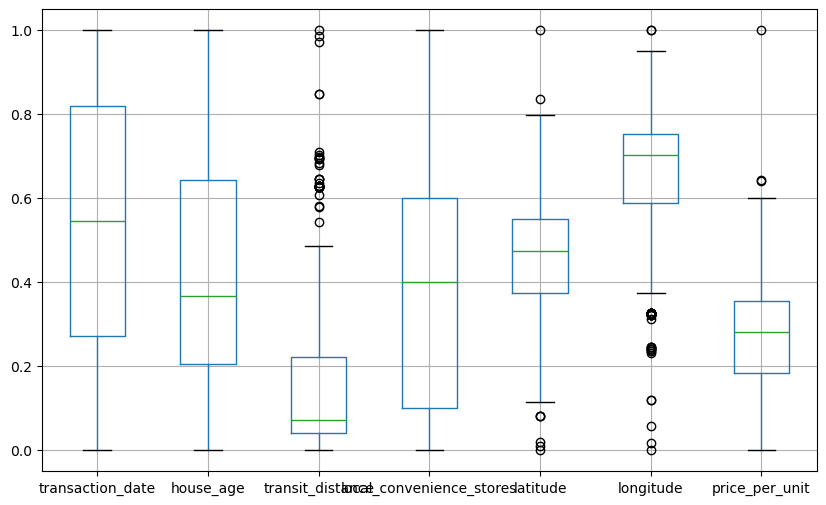

In [24]:
data_minmax_scaled.boxplot(figsize=(10, 6))
plt.show()

In [30]:
## Outlier Detection
# Trim outliers for ArrDelay based on 99.9% percentiles
Price_999pcntile = data.price_per_unit.quantile(0.999)
data = data[data.price_per_unit < Price_999pcntile]

## Reapply MinMaxScaler
#Normalizing the data, using max-min normalization
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data)
data_minmax_scaled = pd.DataFrame(data_minmax_scaled, columns=data.columns)
data_minmax_scaled

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,0.272926,0.730594,0.009513,1.0,0.616941,0.719323,0.428571
1,0.272926,0.445205,0.043809,0.9,0.584949,0.711451,0.489392
2,1.000000,0.303653,0.083315,0.5,0.671231,0.758896,0.561528
3,0.909389,0.303653,0.083315,0.5,0.671231,0.758896,0.667610
4,0.181223,0.114155,0.056799,0.5,0.573194,0.743153,0.502122
...,...,...,...,...,...,...,...
408,0.363537,0.312785,0.627820,0.0,0.114881,0.326504,0.110325
409,0.000000,0.127854,0.010375,0.9,0.512118,0.750162,0.599717
410,0.636463,0.429224,0.056861,0.7,0.571498,0.715225,0.466761
411,0.363537,0.184932,0.012596,0.5,0.420141,0.723959,0.635078


In [65]:
numeric_features = data_minmax_scaled.columns.tolist()
numeric_features.remove('price_per_unit')
#numeric_features.remove('transaction_date')
label = data_minmax_scaled['price_per_unit']



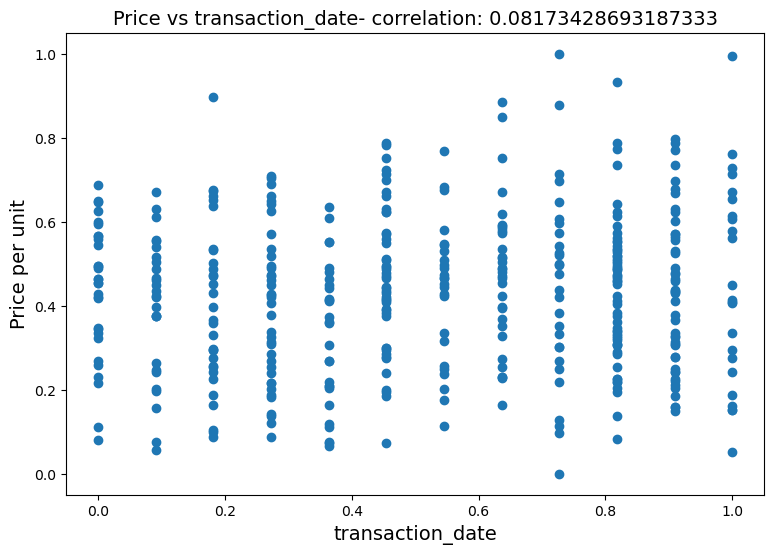

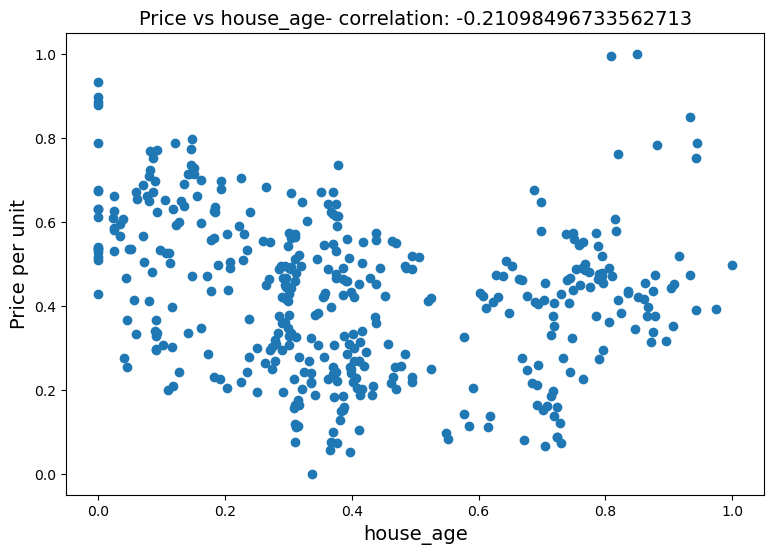

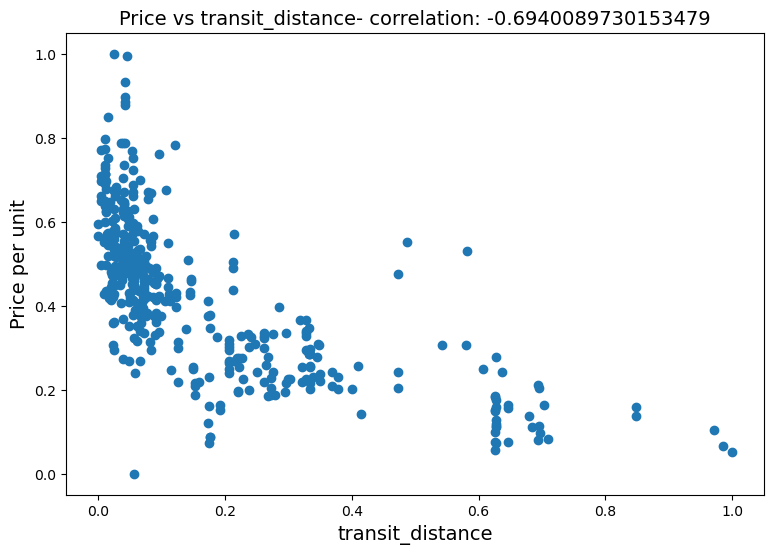

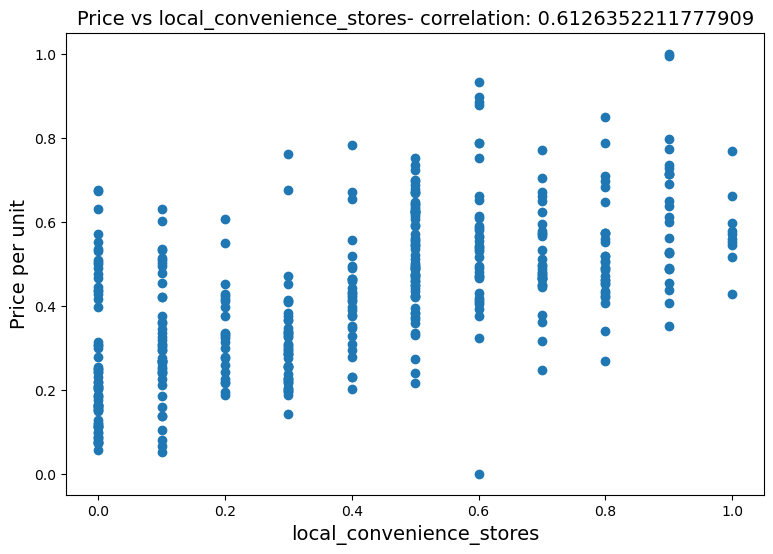

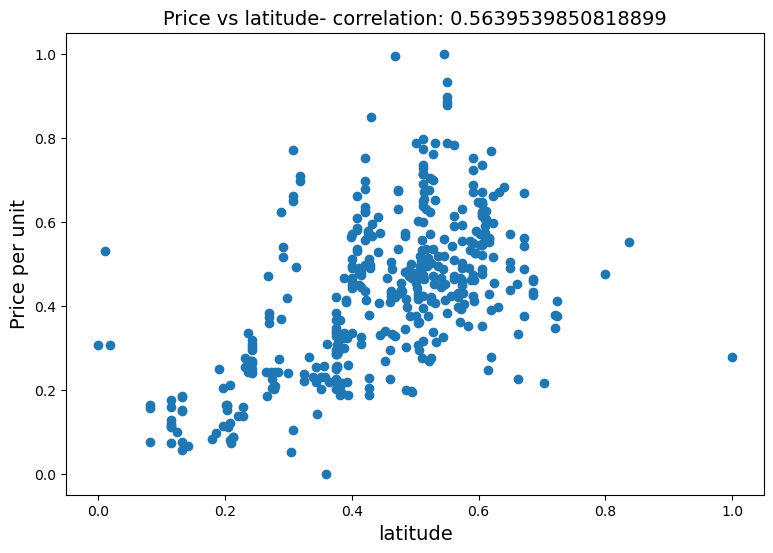

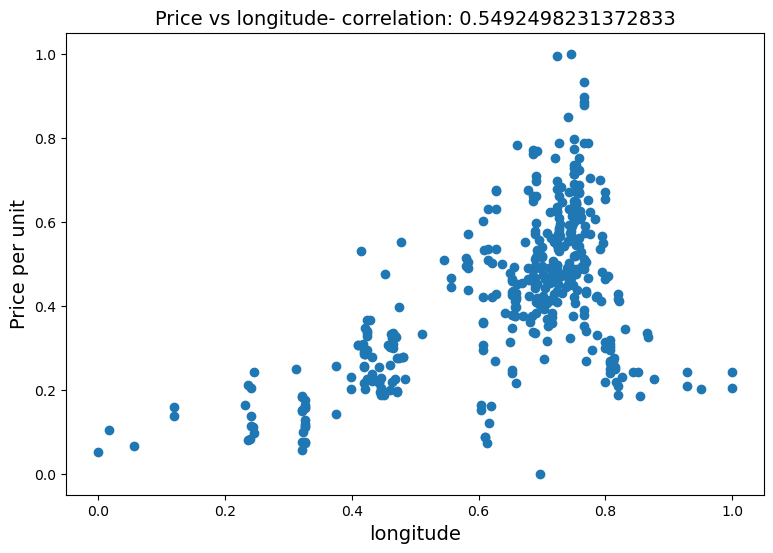

In [66]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data_minmax_scaled[col]
    label = data_minmax_scaled['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price per unit')
    ax.set_title('Price vs ' + col + '- correlation: ' + str(correlation))
plt.show()

In [74]:
# Separate features and labels
#X, y = data_minmax_scaled[numeric_features].values, data_minmax_scaled['price_per_unit'].values
X, y = data[numeric_features].values, data['price_per_unit'].values

print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[2.0129170e+03 3.2000000e+01 8.4878820e+01 1.0000000e+01 2.4982980e+01
  1.2154024e+02]
 [2.0129170e+03 1.9500000e+01 3.0659470e+02 9.0000000e+00 2.4980340e+01
  1.2153951e+02]
 [2.0135830e+03 1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01
  1.2154391e+02]
 [2.0135000e+03 1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01
  1.2154391e+02]
 [2.0128330e+03 5.0000000e+00 3.9056840e+02 5.0000000e+00 2.4979370e+01
  1.2154245e+02]
 [2.0126670e+03 7.1000000e+00 2.1750300e+03 3.0000000e+00 2.4963050e+01
  1.2151254e+02]
 [2.0126670e+03 3.4500000e+01 6.2347310e+02 7.0000000e+00 2.4979330e+01
  1.2153642e+02]
 [2.0134170e+03 2.0300000e+01 2.8760250e+02 6.0000000e+00 2.4980420e+01
  1.2154228e+02]
 [2.0135000e+03 3.1700000e+01 5.5120380e+03 1.0000000e+00 2.4950950e+01
  1.2148458e+02]
 [2.0134170e+03 1.7900000e+01 1.7831800e+03 3.0000000e+00 2.4967310e+01
  1.2151486e+02]]

Labels:
[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]


In [75]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 289 rows
Test Set: 124 rows


# Experimenting

## RandomForestRegressor

In [76]:
# Train the model
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Fit a linear regression model on the training set
#model = LinearRegression().fit(X_train, y_train)
model = RandomForestRegressor().fit(X_train, y_train)
print (model)

RandomForestRegressor()


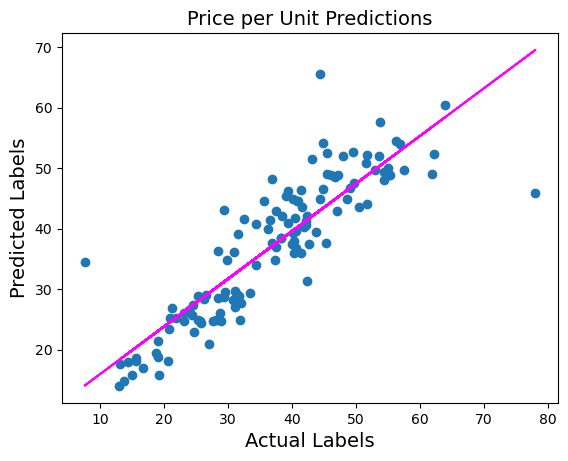

In [77]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per Unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 38.87880261941127
RMSE: 6.2352868915079815
R2: 0.7631446910480999


## GradientBoostingRegressor

GradientBoostingRegressor() 

MSE: 34.065666709998226
RMSE: 5.836580052564877
R2: 0.7924670136517885


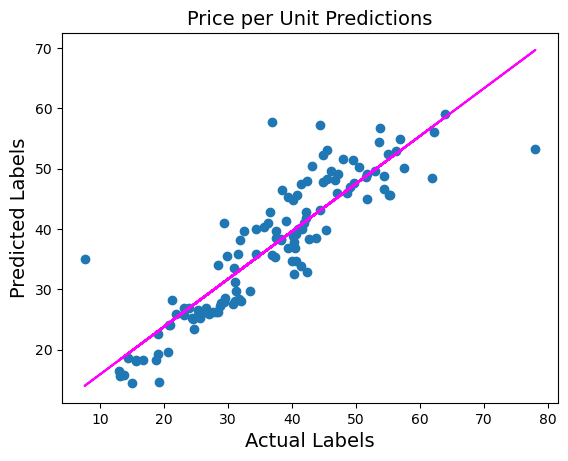

In [79]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a GradientBoost model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per Unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Tuning

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 

MSE: 33.18209353918214
RMSE: 5.760390050958541
R2: 0.7978498696621423


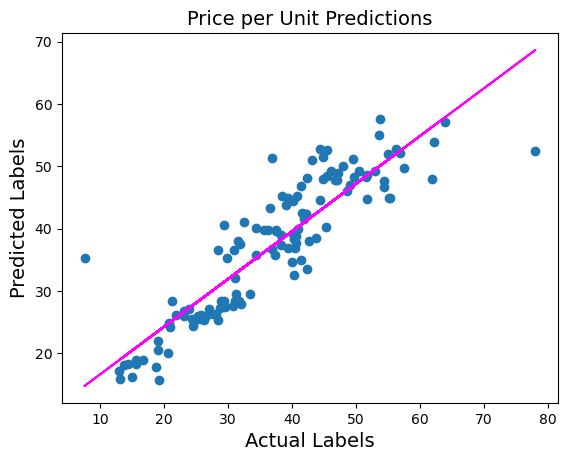

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.08, 0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 75, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per Unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [83]:
# Your code to use the trained model
import joblib

# Save the model as a pickle file
filename = './Price-per-Unit.pkl'
joblib.dump(model, filename)

['./Price-per-Unit.pkl']

In [85]:
# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features based on five-day weather forecast
X_new = np.array([[2013.167,16.2,289.3248,5,24.98203,121.54348],
                  [2013.000,13.2,4082.015,0,24.94155,121.50381]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('Price-per-Unit predictions:')
for prediction in results:
    print(np.round(prediction))

Price-per-Unit predictions:
49.0
18.0
